In [13]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Specify the file path of CSV file
file_path = 'D:/Documents/GitHub/Statistical-Modelling-Project/filtered_merged_data.csv'

# Load the CSV file into a DataFrame
montreal_POI_bike_df = pd.read_csv(file_path)

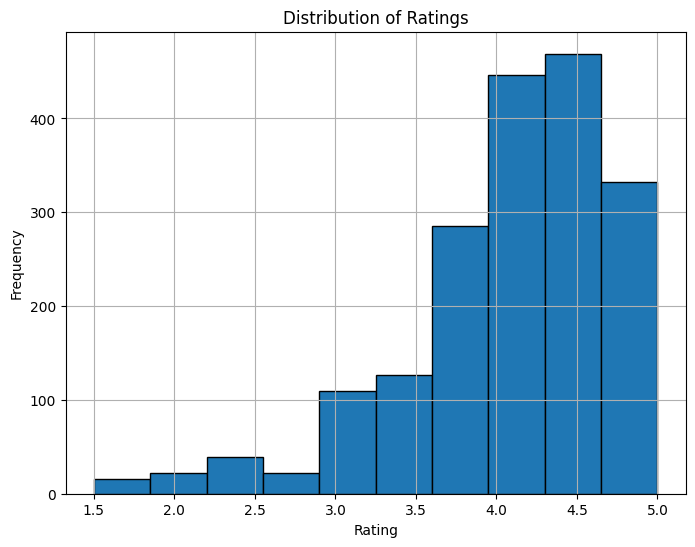

In [3]:
# Histogram of Ratings
plt.figure(figsize=(8, 6))
plt.hist(montreal_POI_bike_df['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.grid(True)
plt.show()

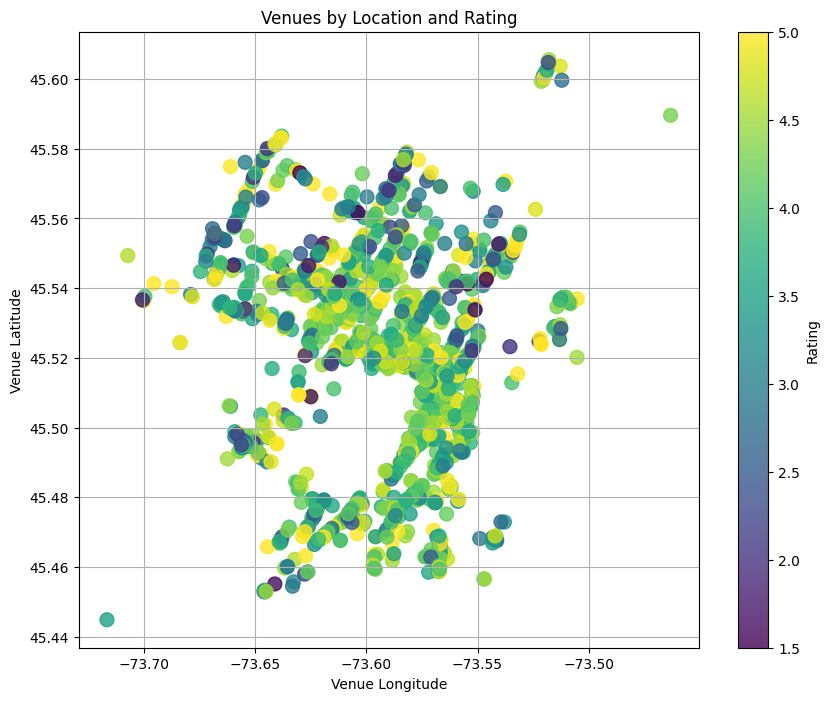

In [4]:
# Scatter plot of venue locations
plt.figure(figsize=(10, 8))
plt.scatter(montreal_POI_bike_df['Venue_Longitude'], montreal_POI_bike_df['Venue_Latitude'], c=montreal_POI_bike_df['Rating'], cmap='viridis', alpha=0.8, s=100)
plt.colorbar(label='Rating')
plt.xlabel('Venue Longitude')
plt.ylabel('Venue Latitude')
plt.title('Venues by Location and Rating')
plt.grid(True)
plt.show()

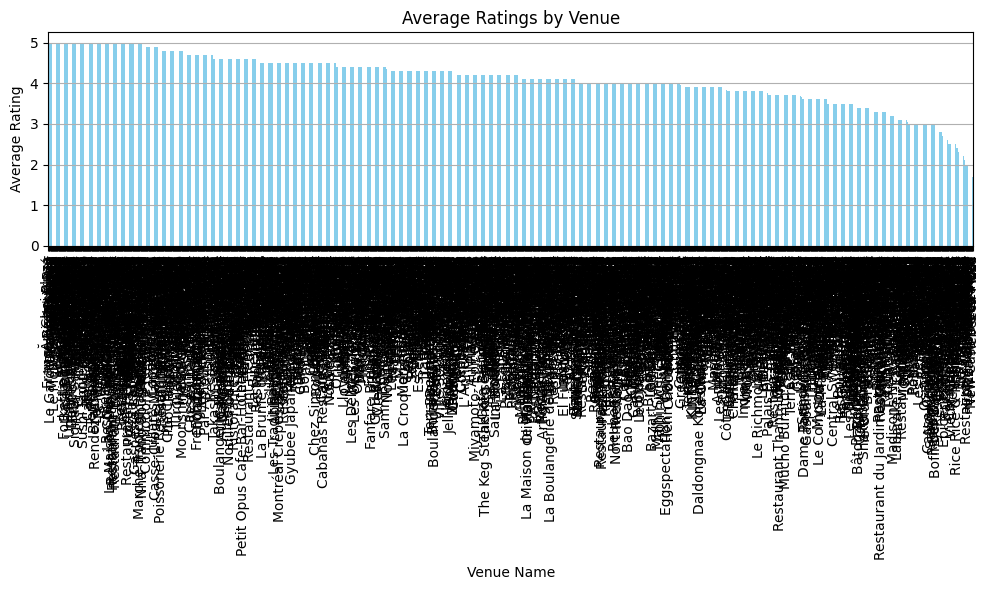

In [5]:
# Bar plot of average ratings by venue name
average_ratings = montreal_POI_bike_df.groupby('Venue_Name')['Rating'].mean()
sorted_average_ratings = average_ratings.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_average_ratings.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Venue Name')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Venue')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#This did not show any real usefulness

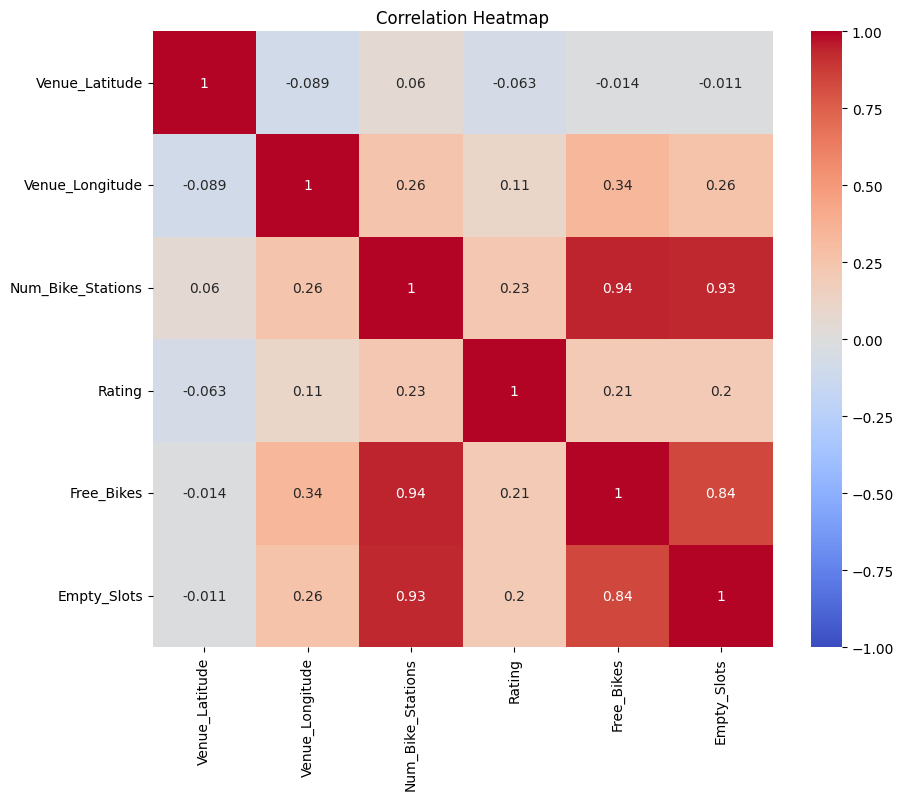

In [6]:
# Selecting only numeric columns for correlation calculation
numeric_columns = montreal_POI_bike_df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

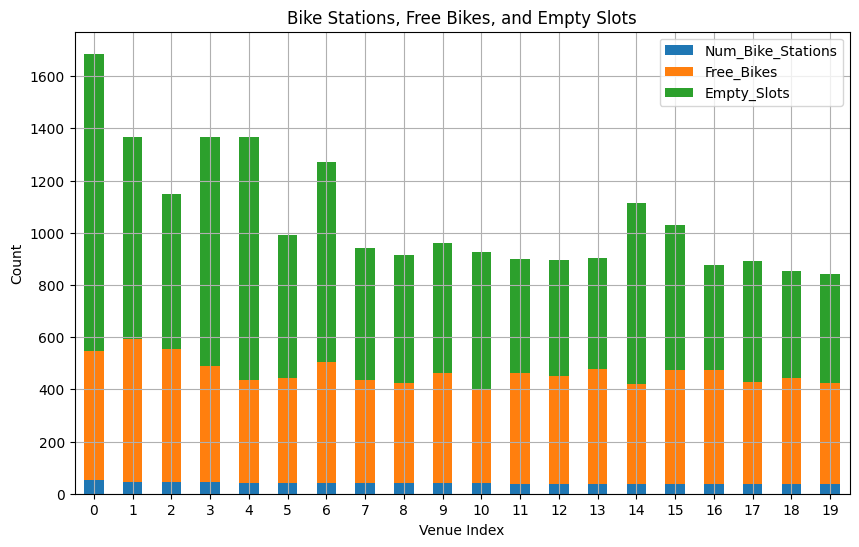

In [21]:
# Stacked bar plot of bike stations, free bikes, and empty slots
bike_stats = montreal_POI_bike_df[['Num_Bike_Stations', 'Free_Bikes', 'Empty_Slots']].head(20)  
bike_stats.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Venue Index')
plt.ylabel('Count')
plt.title('Bike Stations, Free Bikes, and Empty Slots')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [15]:
# Selecting relevant columns for the regression model
data = montreal_POI_bike_df[['Rating', 'Num_Bike_Stations', 'Free_Bikes', 'Empty_Slots']]

# Drop rows with any missing values
data = data.dropna()

# Define dependent variable (y) and independent variables (X)
y = data['Rating']
X = data[['Num_Bike_Stations', 'Free_Bikes', 'Empty_Slots']]

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     36.02
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.26e-22
Time:                        22:27:15   Log-Likelihood:                -1859.8
No. Observations:                1868   AIC:                             3728.
Df Residuals:                    1864   BIC:                             3750.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9087      0.02

In [17]:
# Define dependent variable (y) and independent variable (X)
y = data['Rating']
X = data[['Num_Bike_Stations']]

# Add a constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Create a linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           8.86e-24
Time:                        22:30:19   Log-Likelihood:                -1861.8
No. Observations:                1868   AIC:                             3728.
Df Residuals:                    1866   BIC:                             3739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9176      0.02